In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_engine.encoding import WoEEncoder

In [2]:
data = pd.read_csv(
    "train.csv",usecols=["CryoSleep","Cabin","Destination","Transported"]
)

data["Cabin_1"]= data.Cabin.str.split("/",expand=True)[0]
data["Cabin_3"]= data.Cabin.str.split("/",expand=True)[2]
data.drop("Cabin",axis=1,inplace=True)
data["Transported"] = data["Transported"].astype(int)
data=data.dropna()
data.head()

,CryoSleep,Destination,Transported,Cabin_1,Cabin_3
0,False,TRAPPIST-1e,0,B,P
1,False,TRAPPIST-1e,1,F,S
2,False,TRAPPIST-1e,0,A,S
3,False,TRAPPIST-1e,0,A,S
4,False,TRAPPIST-1e,1,F,S


In [3]:
X= data.drop("Transported",axis=1)
y = data["Transported"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,  
    random_state=10,
)

X_train.shape, X_test.shape

((5676, 4), (2433, 4))

In [4]:
X_train.Cabin_1=X_train.Cabin_1.replace("T","A")

In [5]:
woe_enc = WoEEncoder()
woe_enc.fit(X_train,y_train)

WoEEncoder()

In [6]:
woe_enc.encoder_dict_

{'CryoSleep': {False: -0.7286669949048393, True: 1.4967915672434993},
 'Destination': {'55 Cancri e': 0.4546854576261581,
  'PSO J318.5-22': 0.07244913848607892,
  'TRAPPIST-1e': -0.1429883738010934},
 'Cabin_1': {'A': -0.09869911770975033,
  'B': 0.9505318155213389,
  'C': 0.7121657753200901,
  'D': -0.3762770923123718,
  'E': -0.6374719923443399,
  'F': -0.22495190651323163,
  'G': 0.06472846296017992},
 'Cabin_3': {'P': -0.22033689126751035, 'S': 0.2178976026615714}}

In [7]:
X_test.Cabin_1.value_counts()

Cabin_1
F    774
G    745
E    267
B    223
C    207
D    140
A     76
T      1
Name: count, dtype: int64

In [8]:
test_t=woe_enc.transform(X_test)

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) Cabin_1.
  warnings.warn(


In [9]:
woe_enc.transform(X_test).Cabin_1.value_counts()

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) Cabin_1.
  warnings.warn(


Cabin_1
-0.224952    774
 0.064728    745
-0.637472    267
 0.950532    223
 0.712166    207
-0.376277    140
-0.098699     76
Name: count, dtype: int64

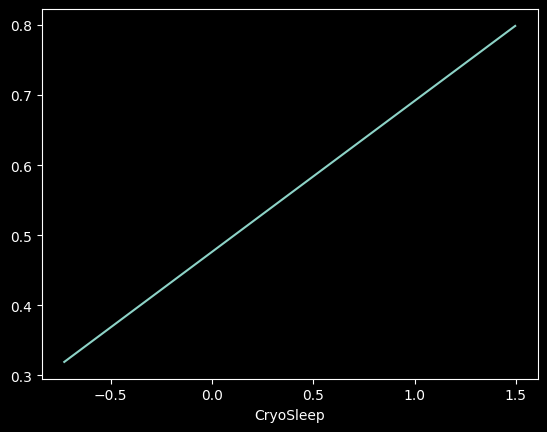

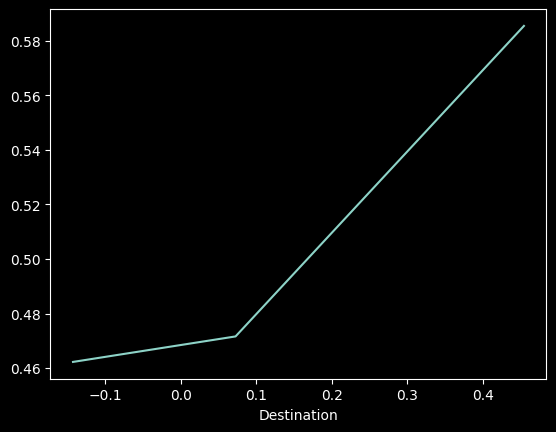

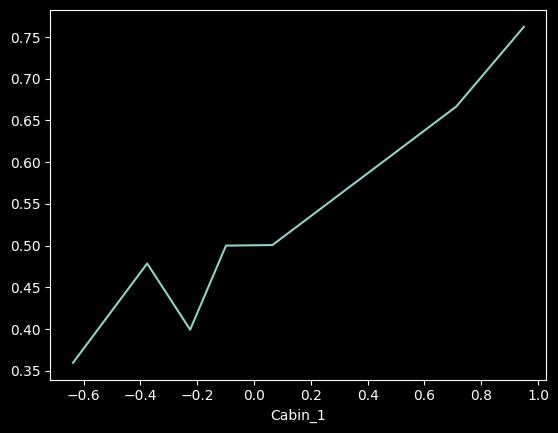

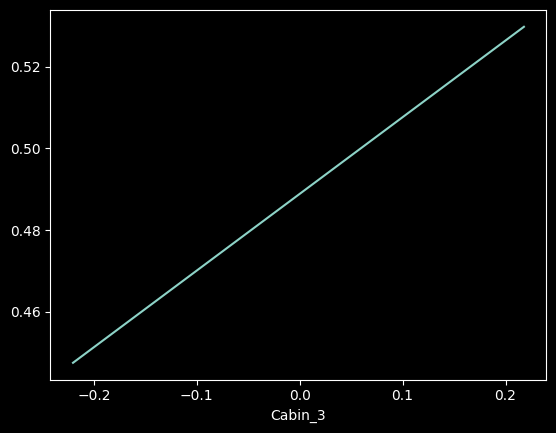

In [10]:
plt.style.use("dark_background")
for col in test_t.columns:
    fig = plt.figure()
    fig = y_test.groupby(test_t[col]).mean().plot()
    plt.show()

In [11]:
from category_encoders.woe import WOEEncoder

woe = WOEEncoder()

woe.fit(X_train,y_train)
woe.mapping

{'CryoSleep': CryoSleep
  1   -0.728229
  2    1.494649
 -1    0.000000
 -2    0.000000
 dtype: float64,
 'Destination': Destination
  1   -0.142908
  2    0.453845
  3    0.072051
 -1    0.000000
 -2    0.000000
 dtype: float64,
 'Cabin_1': Cabin_1
  1    0.946122
  2    0.064633
  3    0.708943
  4   -0.224727
  5   -0.374120
  6   -0.635216
  7   -0.098009
 -1    0.000000
 -2    0.000000
 dtype: float64,
 'Cabin_3': Cabin_3
  1    0.217744
  2   -0.220180
 -1    0.000000
 -2    0.000000
 dtype: float64}

In [12]:
woe.transform(X_train).Cabin_1.value_counts()

Cabin_1
-0.224727    1885
 0.064633    1706
-0.635216     566
 0.946122     521
 0.708943     506
-0.374120     319
-0.098009     173
Name: count, dtype: int64

In [13]:
cat_t = woe.transform(X_test)

In [14]:
X_test.Cabin_1.value_counts()

Cabin_1
F    774
G    745
E    267
B    223
C    207
D    140
A     76
T      1
Name: count, dtype: int64

In [15]:
cat_t.Cabin_1.value_counts()

Cabin_1
-0.224727    774
 0.064633    745
-0.635216    267
 0.946122    223
 0.708943    207
-0.374120    140
-0.098009     76
 0.000000      1
Name: count, dtype: int64